In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def conductance(g_ex, delta_t, tau_ex):
    g_ex_new = g_ex - ((g_ex*delta_t)/tau_ex)
    return g_ex_new

def voltage(v, delta_t, cm, gl, El, g_ex, Eex):
    final_voltage = v + (delta_t/cm)*(-gl*(v-El) - g_ex*(v-Eex))
    return final_voltage

In [9]:
cm = 10
gl = 1
El = -70
Eex = 0
tau_ex = 10
v_th = -54
v_reset = -80

delta_g_ex = 0.5
delta_t= 0.1

In [10]:
Ap_time = [100,200,250, 230, 300,320, 400, 410]
total_time_steps = 10000
total_time = delta_t*total_time_steps
#g_ex_new = np.zeros(total_time_steps)
v_all = np.zeros(total_time_steps)

g_ex=0.5

v = -60

for i in range(total_time_steps):
    
    #print(g_ex_new)
    #print(final_voltage)
    if np.isin(i*delta_t, Ap_time):
        g_ex = g_ex + delta_g_ex
        
    if v == 20:
        v_new = v_reset
    elif v>= v_th:
        v_new = 20
    else:
        g_ex_new = conductance(g_ex, delta_t, tau_ex)
        v_new = voltage(v, delta_t, cm, gl, El, g_ex_new, Eex)
        
        
    
    
    v_all[i] = v_new
    v = v_new
    g_ex= g_ex_new
        
        

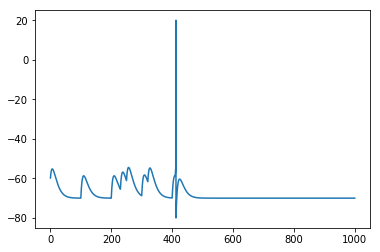

In [11]:
plt.plot(np.arange(0, total_time_steps)*delta_t,v_all)
plt.show()

In [12]:
"""g_ex_new = g_ex_new + delta_g_ex
plt.plot(final_voltage,g_ex_new)
plt.show()"""

'g_ex_new = g_ex_new + delta_g_ex\nplt.plot(final_voltage,g_ex_new)\nplt.show()'